In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/10
782/782 - 66s - 85ms/step - accuracy: 0.4158 - loss: 1.6016 - val_accuracy: 0.4866 - val_loss: 1.4006
Epoch 2/10
782/782 - 63s - 81ms/step - accuracy: 0.5589 - loss: 1.2467 - val_accuracy: 0.5991 - val_loss: 1.1395
Epoch 3/10
782/782 - 82s - 105ms/step - accuracy: 0.6171 - loss: 1.0907 - val_accuracy: 0.6161 - val_loss: 1.0775
Epoch 4/10
782/782 - 79s - 101ms/step - accuracy: 0.6530 - loss: 0.9888 - val_accuracy: 0.6474 - val_loss: 1.0115
Epoch 5/10
782/782 - 84s - 107ms/step - accuracy: 0.6797 - loss: 0.9129 - val_accuracy: 0.6782 - val_loss: 0.9183
Epoch 6/10
782/782 - 82s - 105ms/step - accuracy: 0.7022 - loss: 0.8528 - val_accuracy: 0.6894 - val_loss: 0.8967
Epoch 7/10
782/782 - 81s - 103ms/step - accuracy: 0.7190 - loss: 0.8016 - val_accuracy: 0.6768 - val_loss: 0.9673
Epoch 8/10
782/782 - 83s - 106ms/step - accuracy: 0.7340 - loss: 0.7641 - val_accuracy: 0.7014 - val_loss: 0.8641
Epoch 9/10
782/782 - 80s - 103ms/step - accuracy: 0.7477 - loss: 0.7228 - val_accuracy: 0.

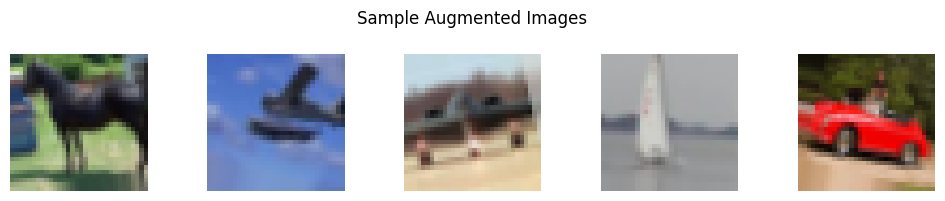

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 - 91s - 116ms/step - accuracy: 0.3940 - loss: 1.6616 - val_accuracy: 0.4715 - val_loss: 1.4671
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 5s - 7ms/step - accuracy: 0.5000 - loss: 1.5027 - val_accuracy: 0.4703 - val_loss: 1.4704
Epoch 3/10
781/781 - 136s - 174ms/step - accuracy: 0.5081 - loss: 1.3698 - val_accuracy: 0.5837 - val_loss: 1.1692
Epoch 4/10
781/781 - 4s - 5ms/step - accuracy: 0.5156 - loss: 1.4351 - val_accuracy: 0.5812 - val_loss: 1.1744
Epoch 5/10
781/781 - 136s - 174ms/step - accuracy: 0.5600 - loss: 1.2337 - val_accuracy: 0.6160 - val_loss: 1.0891
Epoch 6/10
781/781 - 5s - 7ms/step - accuracy: 0.6562 - loss: 1.1130 - val_accuracy: 0.6106 - val_loss: 1.1044
Epoch 7/10
781/781 - 137s - 176ms/step - accuracy: 0.5863 - loss: 1.1589 - val_accuracy: 0.6029 - val_loss: 1.1475
Epoch 8/10
781/781 - 4s - 5ms/step - accuracy: 0.6875 - loss: 0.9677 - val_accuracy: 0.6126 - val_loss: 1.1219
Epoch 9/10
781/781 - 139s - 178ms/step - accuracy: 0.6080 - loss: 1.1007 - val_accuracy: 0.6463 - val_loss: 1.0222
Epoch 10/10
781/781 - 5s - 7ms/step - accuracy: 0.6094 - loss: 1.1773 - val_accuracy: 0.6366 - val_loss: 1.

In [ ]:
# ====== Setup ======
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ====== Output directory on Google Drive ======
OUTPUT_DIR = '/content/drive/MyDrive/Colab Notebooks/DL_2025/8/'
FIGURE_DIR = os.path.join(OUTPUT_DIR, 'figures')
RESULTS_DIR = os.path.join(OUTPUT_DIR, 'results')

os.makedirs(FIGURE_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# ====== Load CIFAR-10 ======
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# ====== Define CNN model ======
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ====== Helper function to plot ======
def plot_history(history, title, save_name):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"{FIGURE_DIR}/{save_name}.png")
    plt.close()

# ====== Train without augmentation ======
model_plain = build_cnn()
history_plain = model_plain.fit(x_train, y_train,
                                epochs=10,
                                validation_data=(x_test, y_test),
                                batch_size=64,
                                verbose=2)

# Save plots and results
plot_history(history_plain, "No Augmentation", "no_augmentation")
df_plain = pd.DataFrame(history_plain.history)
df_plain.to_csv(f"{RESULTS_DIR}/no_augmentation_results.csv", index=False)

# ====== Data Augmentation ======
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# ====== Show example augmented images ======
print("Displaying augmented images:")
plt.figure(figsize=(10, 2))
for i, (img, label) in enumerate(datagen.flow(x_train, y_train, batch_size=1)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img[0])
    plt.axis('off')
    if i == 4:
        break
plt.suptitle("Sample Augmented Images")
plt.tight_layout()
plt.savefig(f"{FIGURE_DIR}/augmented_samples.png")
plt.show()

# ====== Train with augmentation ======
model_aug = build_cnn()
history_aug = model_aug.fit(datagen.flow(x_train, y_train, batch_size=64),
                            epochs=10,
                            validation_data=(x_test, y_test),
                            steps_per_epoch=len(x_train) // 64,
                            verbose=2)

# Save plots and results
plot_history(history_aug, "With Augmentation", "with_augmentation")
df_aug = pd.DataFrame(history_aug.history)
df_aug.to_csv(f"{RESULTS_DIR}/with_augmentation_results.csv", index=False)

print(f"Training completed. All results saved in: {OUTPUT_DIR}")
